# Calibration of size

In [33]:
import math
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [34]:
d_km = distance(NW_lat_long, SE_lat_long)

In [35]:
d_px_0 = convert_lat_log_to_px(SE_lat_long,NW_lat_long, zoom, NW_lat_long[0], NW_lat_long[1])

In [36]:
d_px_1 = convert_lat_log_to_px(SE_lat_long,NW_lat_long, zoom, SE_lat_long[0], SE_lat_long[1])

In [37]:
d_pixels = np.sqrt(d_px_1[1]**2+d_px_1[0]**2)

In [38]:
d_pixels

2249.2500673167224

In [39]:
def meters_to_piels(ref_m, ref_px, meters):
    return meters/ref_m*ref_px

In [40]:
px_test = meters_to_piels(d_km*1000,d_pixels, 10)

In [41]:
px_test

20.361125829833938

# variable masked region 

<IPython.core.display.Javascript object>


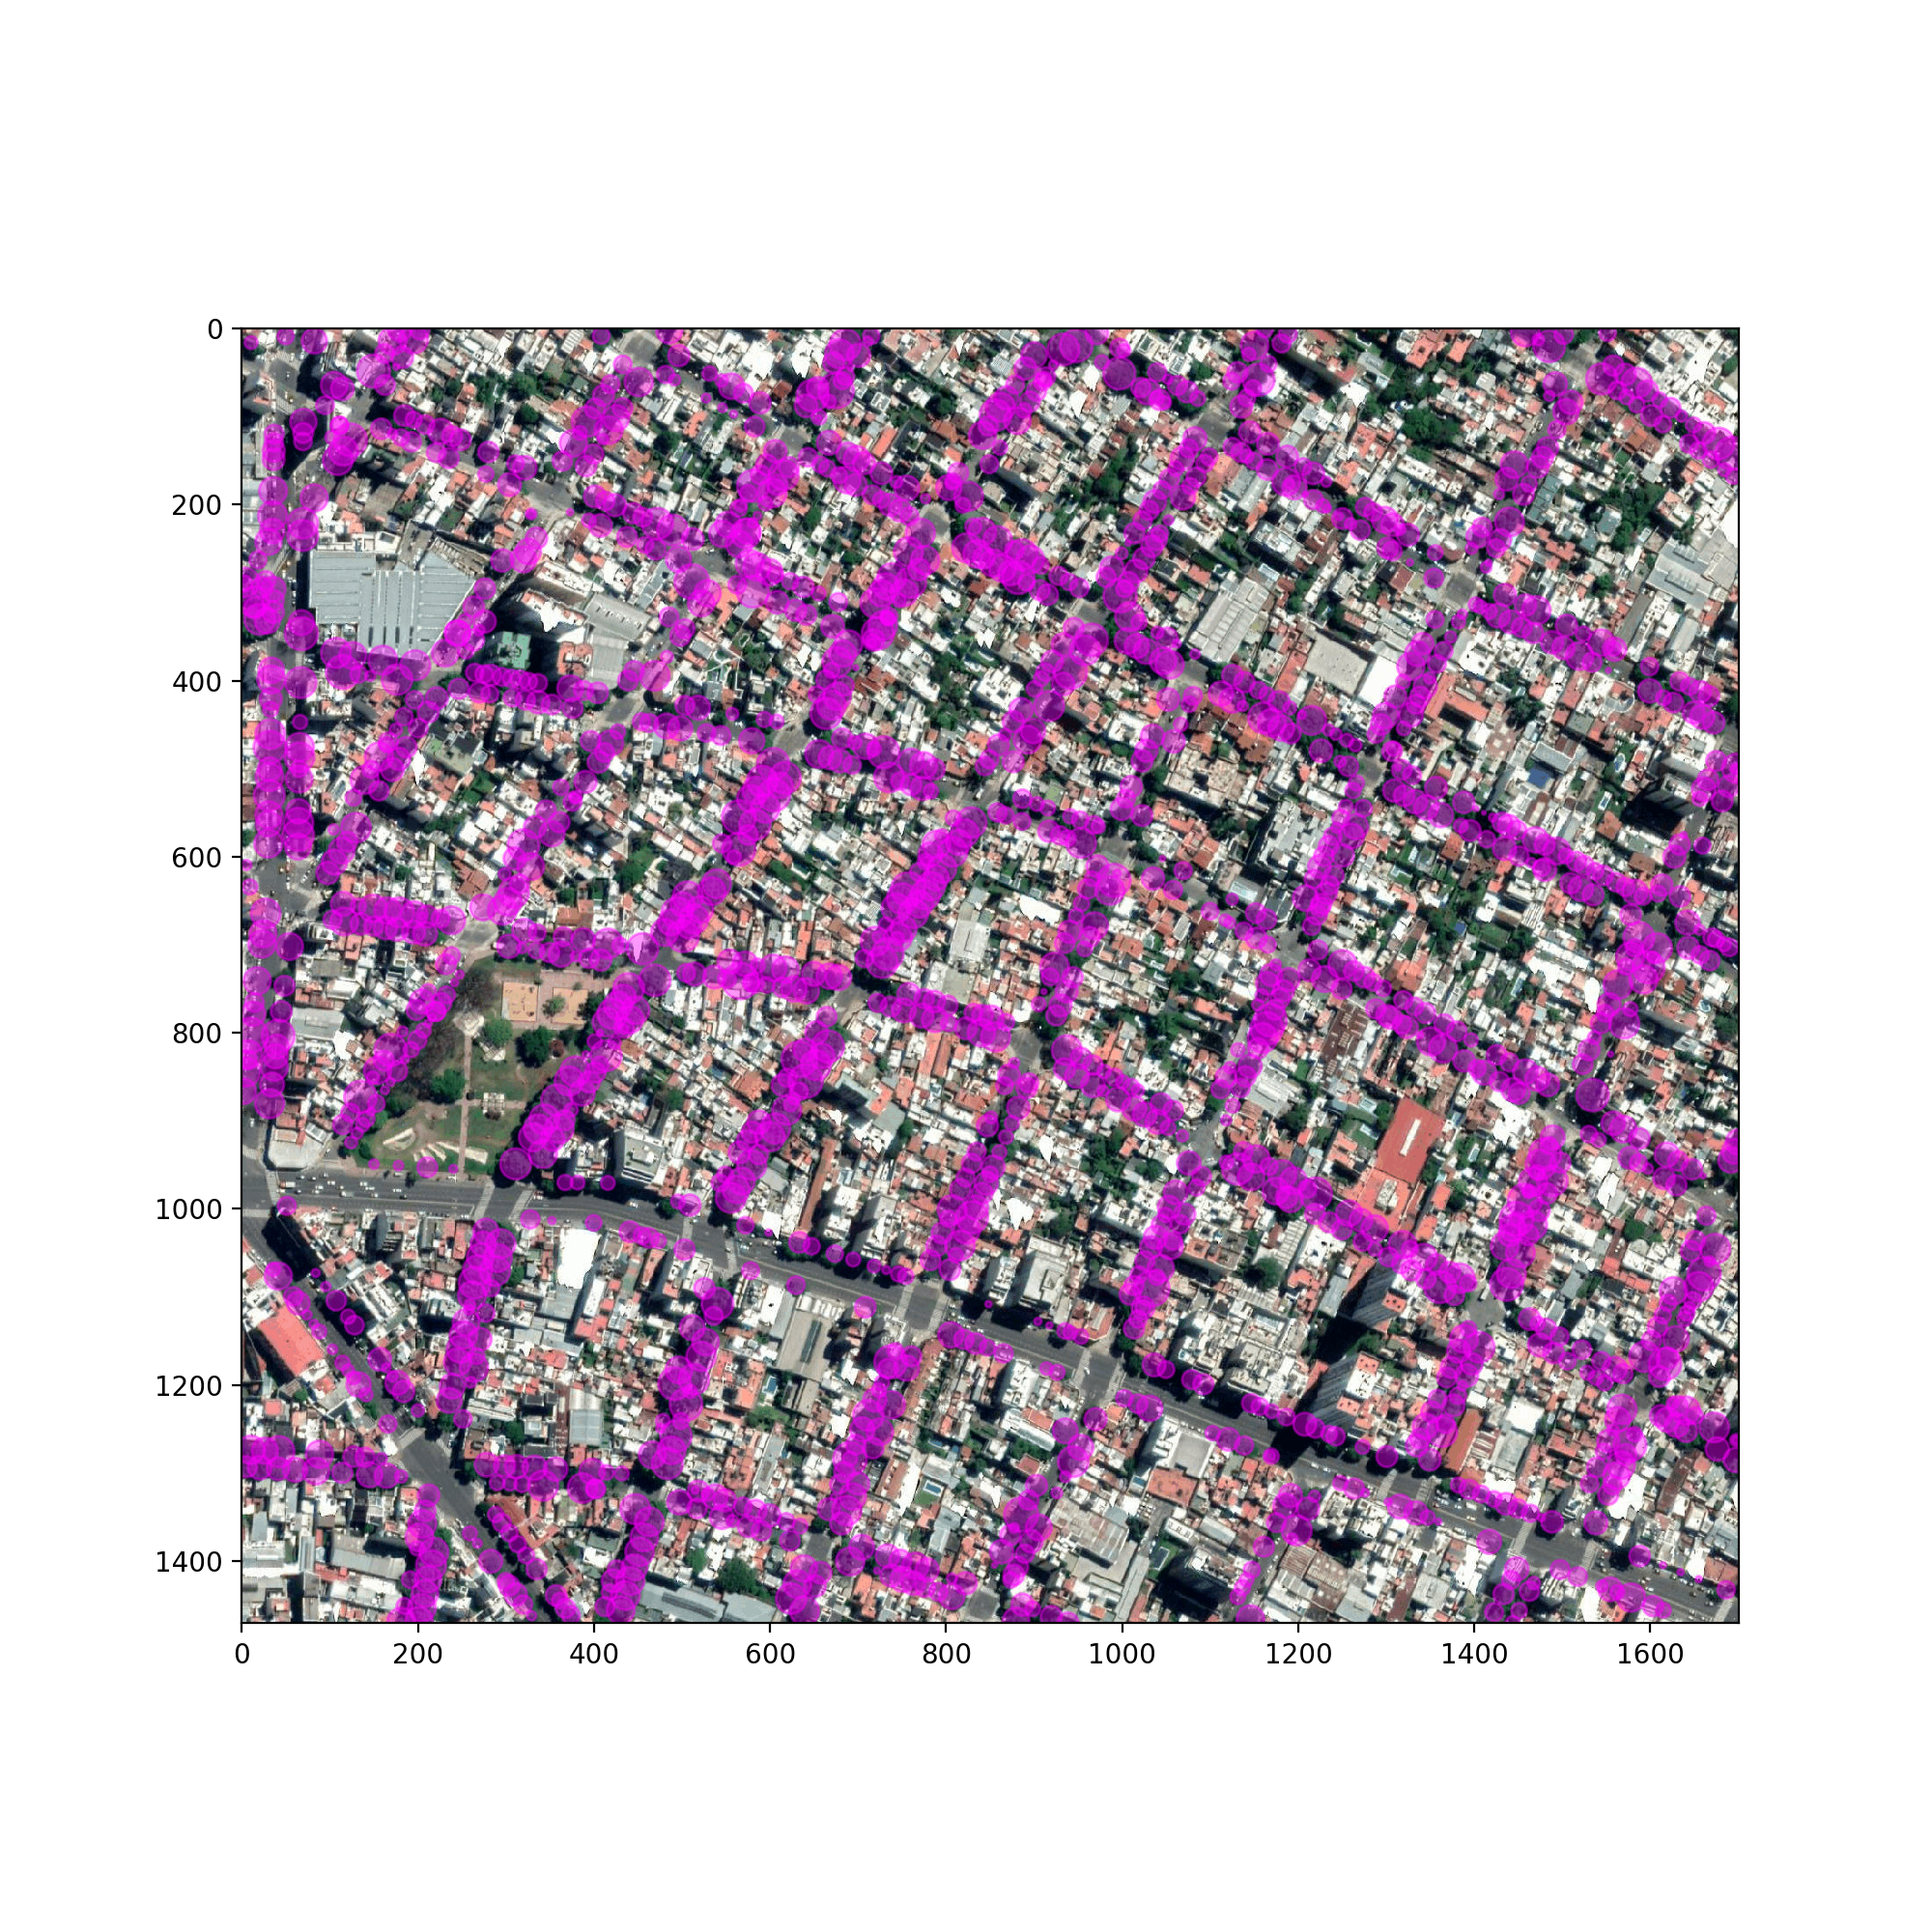

In [77]:
trees_coords = []
px_coords = []

plt.figure(figsize=(10,10))
plt.imshow(final)


for index, row in list(trees_filtred.iterrows()):
    #rint(index)
    #print(row)
    t_lat, t_long = ((row.lat, row.long))
    px_lat, px_long = convert_lat_log_to_px(SE_lat_long, NW_lat_long, zoom, row.lat, row.long)
    px_tree_radius = meters_to_piels(d_km*1000, d_pixels, np.sqrt(row.diametro))
    #print(row.diametro, px_tree_radius)
    #px_coords.append(( px_lat, px_long))   
    circ = plt.Circle((px_lat, px_long), radius = px_tree_radius, color='magenta', alpha=0.4)
    plt.gcf().gca().add_artist(circ)    
    
#for circ_px in px_coords:
#    circ = plt.Circle(circ_px, radius =10, color='magenta', alpha=0.5)
#    plt.gcf().gca().add_artist(circ)    

<IPython.core.display.Javascript object>


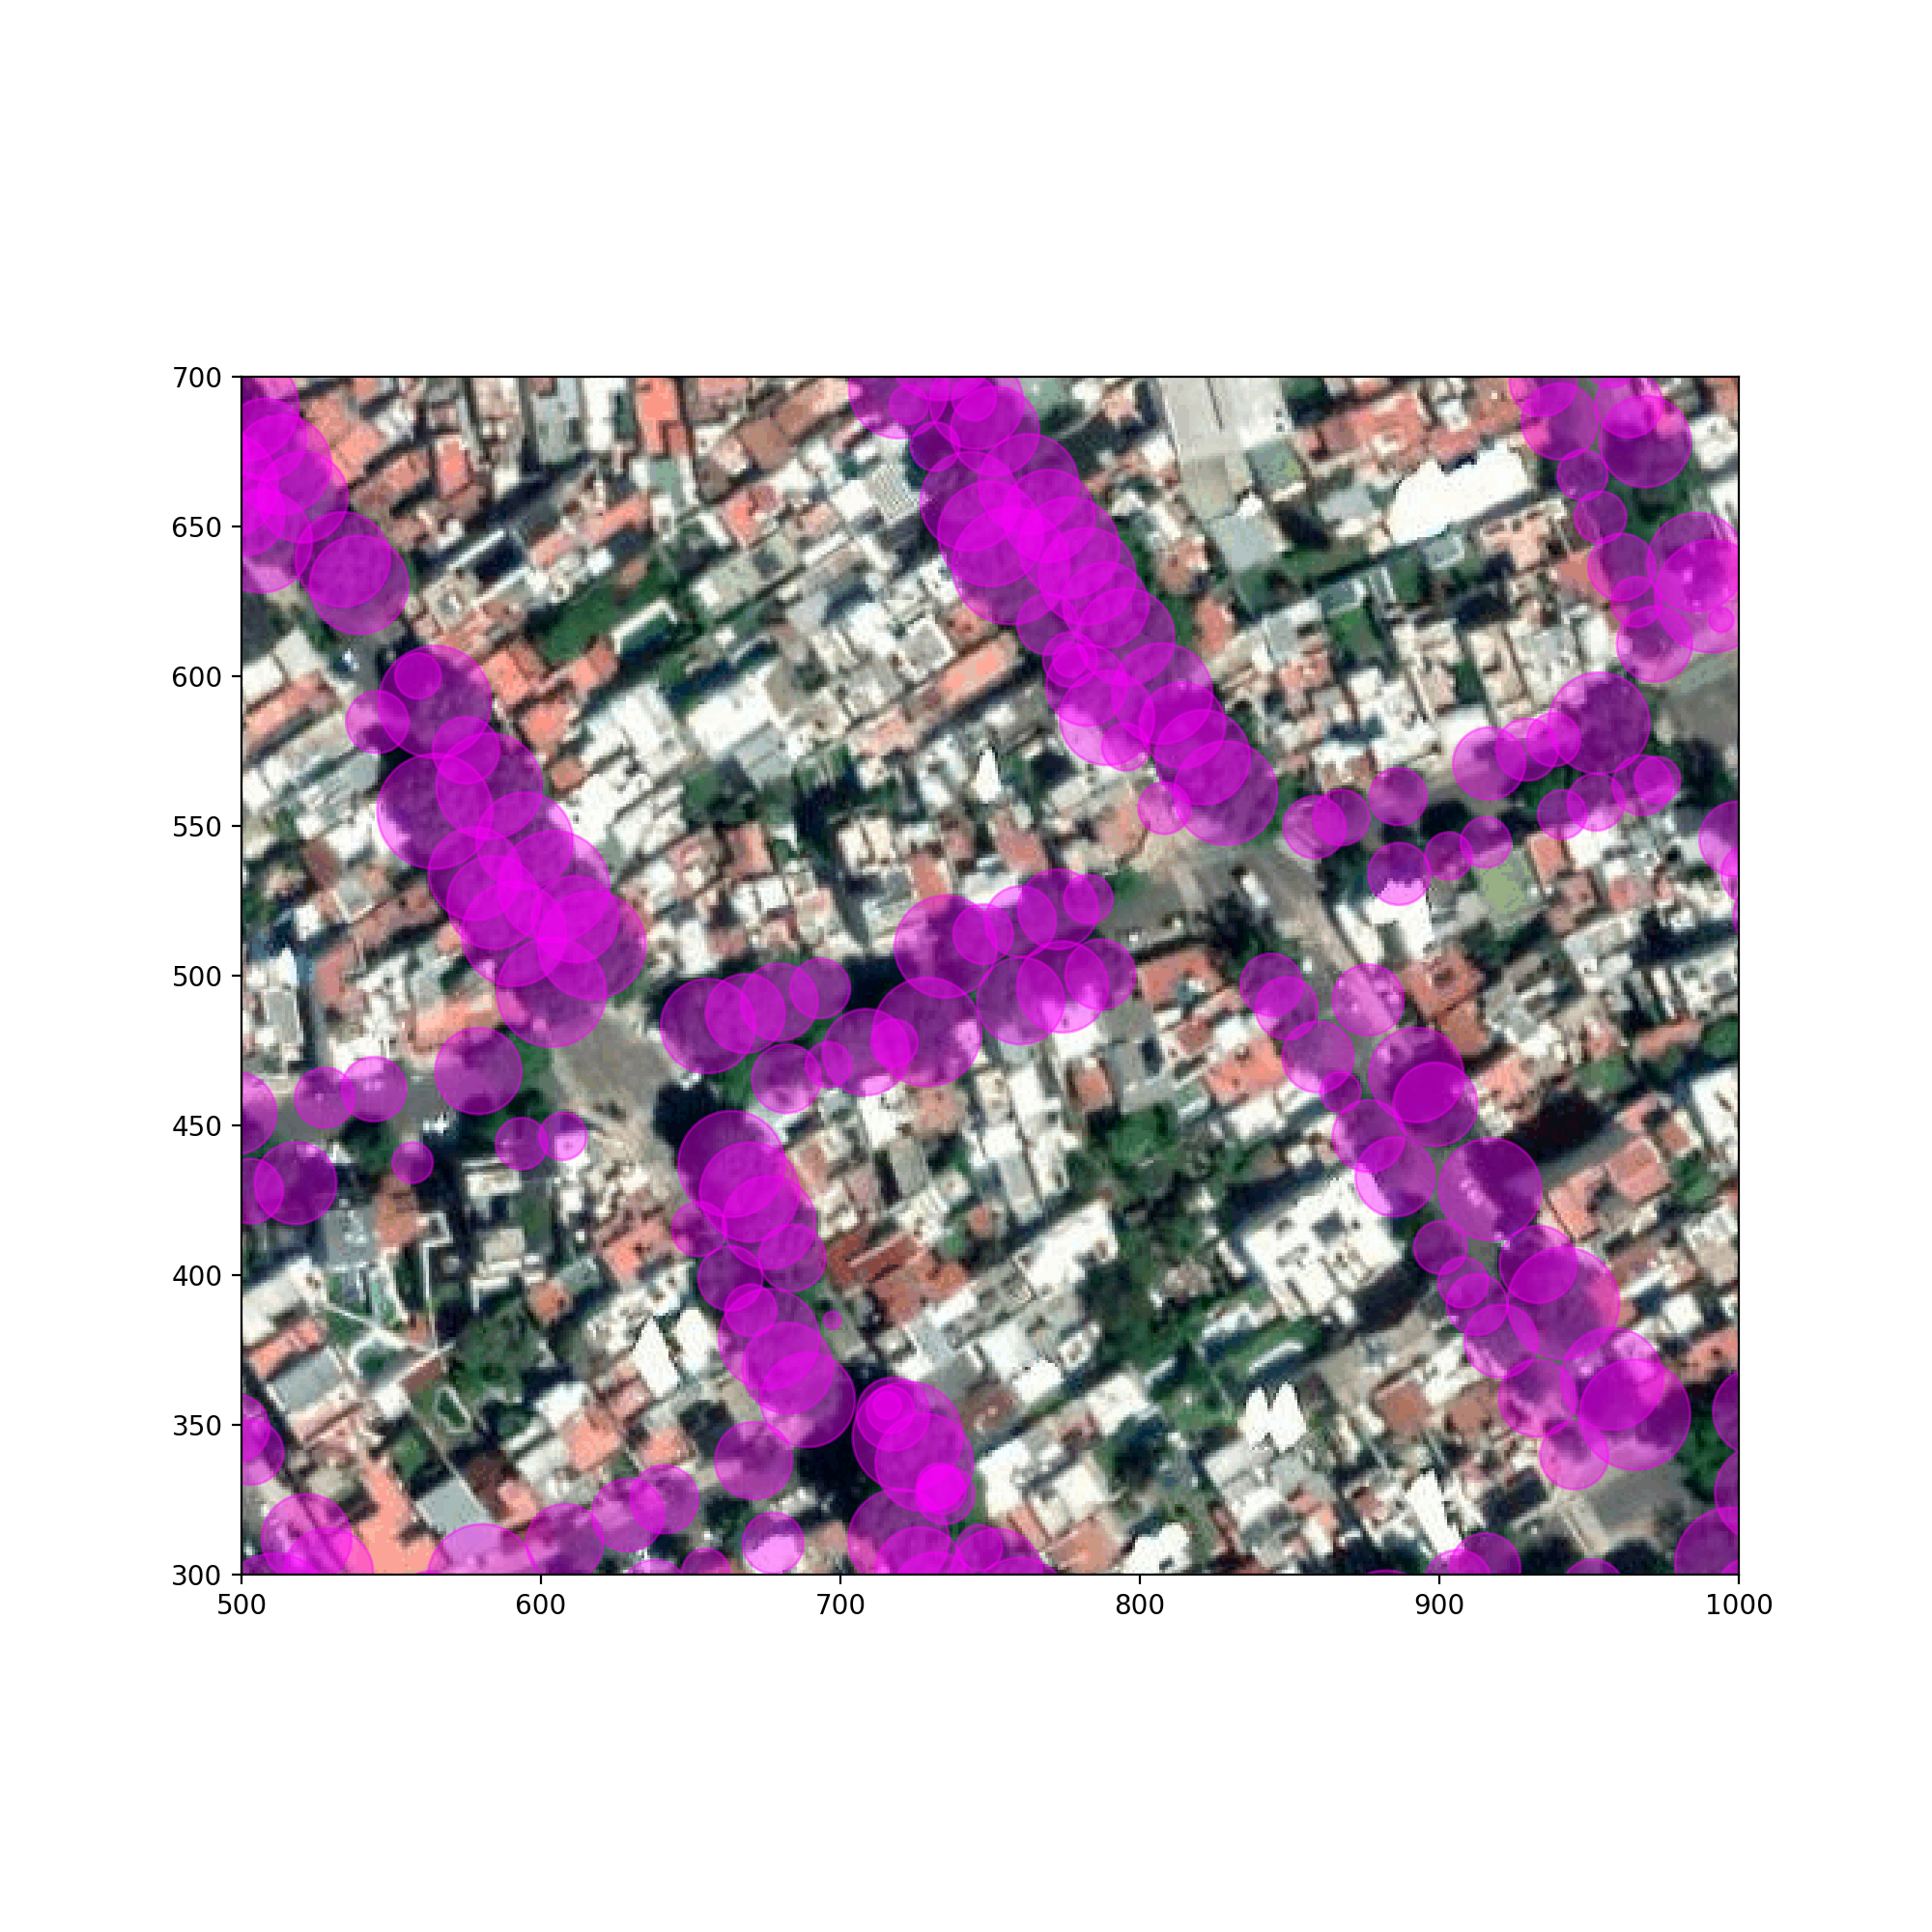

In [80]:
trees_coords = []
px_coords = []

plt.figure(figsize=(10,10))
plt.imshow(final)
plt.xlim([500,1000])
plt.ylim([300,700])
for index, row in list(trees_filtred.iterrows()):
    #rint(index)
    #print(row)
    t_lat, t_long = ((row.lat, row.long))
    px_lat, px_long = convert_lat_log_to_px(SE_lat_long, NW_lat_long, zoom, row.lat, row.long)
    px_tree_radius = meters_to_piels(d_km*1000, d_pixels, np.sqrt(row.diametro))
    #print(row.diametro, px_tree_radius)
    #px_coords.append(( px_lat, px_long))   
    circ = plt.Circle((px_lat, px_long), radius = px_tree_radius, color='magenta', alpha=0.4)
    plt.gcf().gca().add_artist(circ)    
    
#for circ_px in px_coords:
#    circ = plt.Circle(circ_px, radius =10, color='magenta', alpha=0.5)
#    plt.gcf().gca().add_artist(circ)    